In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from itertools import cycle

In [4]:
! rsync --progress "bluemoon-user1.uvm.edu:thesis/data/zoom/hizanidis_params.pkl" "../../data/zoom/hizanidis_params.pkl"

hizanidis_params.pkl
      128867 100%    2.19MB/s    0:00:00 (xfer#1, to-check=0/1)

sent 1148 bytes  received 128933 bytes  86720.67 bytes/sec
total size is 128867  speedup is 0.99


In [31]:
with open("../../data/hizanidis_params.pkl", "rb") as f:
    params = pickle.load(f)

params.head()

,alpha,beta,metastability,chimera,max_phase
0,1.053,0.656,0.059600,0.062478,25132.741229
1,2.835,0.431,0.075429,0.080300,25132.741229
2,0.770,0.513,0.058560,0.061334,25132.741229
3,1.053,0.349,0.080334,0.085282,25132.741229
4,1.013,0.082,0.059560,0.062754,25132.741229


In [32]:
good = params[params["max_phase"] <= 2*np.pi]

In [33]:
good.shape

(620, 5)

In [34]:
good["beta"].max()

0.8

In [35]:
for alpha in params[params["alpha"] > 0.851]["alpha"].unique():
    print(f"{alpha:0.03f}-*", end=" ")

1.053-* 2.835-* 1.013-* 1.539-* 2.673-* 2.187-* 3.038-* 2.876-* 1.904-* 2.309-* 0.932-* 1.256-* 0.972-* 1.985-* 2.106-* 3.159-* 1.215-* 2.471-* 3.119-* 0.891-* 2.390-* 1.418-* 1.863-* 1.742-* 1.944-* 2.552-* 1.134-* 1.620-* 2.633-* 1.458-* 2.147-* 1.094-* 1.175-* 2.916-* 1.580-* 2.957-* 1.823-* 3.200-* 2.511-* 2.592-* 1.377-* 2.349-* 2.025-* 2.268-* 2.997-* 1.661-* 2.228-* 2.066-* 2.795-* 1.296-* 1.499-* 1.782-* 2.714-* 2.754-* 1.337-* 1.701-* 2.430-* 3.078-* 

In [36]:
good.sort_values("chimera", ascending=False).head(10)

,alpha,beta,metastability,chimera,max_phase
1720,0.041,0.021,0.078319,0.083388,6.283185
2734,0.851,0.021,0.067366,0.069392,6.283185
3030,0.810,0.021,0.066662,0.068546,6.283185
2343,0.608,0.390,0.069052,0.068272,6.283185
795,0.770,0.041,0.065538,0.067631,6.283185
1351,0.810,0.062,0.065212,0.067396,6.283185
1039,0.608,0.451,0.067431,0.067030,6.283185
1506,0.648,0.082,0.064980,0.067024,6.283185
1190,0.729,0.062,0.065076,0.066942,6.283185
1684,0.567,0.062,0.064568,0.066814,6.283185


In [37]:
c = good.pivot_table(values="chimera", index="beta", columns="alpha")

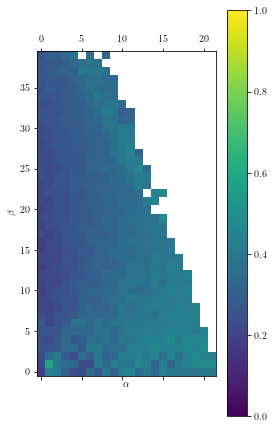

In [38]:
plt.matshow(c.values[:, :]*7, origin="lower", vmin=0, vmax=1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

In [40]:
good["alpha"].unique()[16]

0.729

In [10]:
m = params.pivot_table(values="metastability", index="beta", columns="alpha")

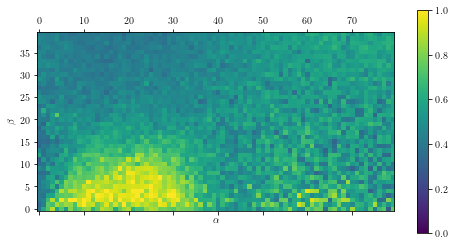

In [11]:
plt.matshow(m.values[:, :]*12, origin="lower", vmin=0, vmax=1)
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();